#Data Pre-processing 

##Standard Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download the dataset from kaggle to google drive

In [ ]:
%cd drive/MyDrive/BrainSightAI

/content/drive/MyDrive


In [ ]:
#download the dataset from kaggle

'/content/drive/MyDrive/BrainSightAI'

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nivedithak15","key":"b3af768802d44ffde7e24af4ea58a27d"}'}

In [ ]:
#make sure kaggle.json file is present
!ls -lha kaggle.json

-rw------- 1 root root 68 Jul  8 06:19 kaggle.json


In [ ]:
#Install kaggle API client
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#set permissions
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content/drive/MyDrive/BrainSightAI


In [ ]:
!kaggle datasets list

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/BrainSightAI"

In [ ]:
!kaggle competitions download -c autism-prediction

  0% 0.00/26.2k [00:00<?, ?B/s]
100% 26.2k/26.2k [00:00<00:00, 1.49MB/s]


In [ ]:
#unzipping the file
!unzip autism-prediction.zip

Archive:  autism-prediction.zip
  inflating: Autism-prediction/sample_submission.csv  
  inflating: Autism-prediction/test.csv  
  inflating: Autism-prediction/train.csv  


##Reading train and test

In [6]:
%cd /content/drive/MyDrive/BrainSightAI/Autism-prediction

/content/drive/MyDrive/BrainSightAI/Autism-prediction


In [7]:
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

In [8]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [9]:
df_train.shape

(800, 22)

In [10]:
df_test.shape

(200, 21)

In [11]:
df_test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [12]:
#combine test and train data
df = pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

#Data Cleaning

In [13]:
df.count()

ID                 1000
A1_Score           1000
A2_Score           1000
A3_Score           1000
A4_Score           1000
A5_Score           1000
A6_Score           1000
A7_Score           1000
A8_Score           1000
A9_Score           1000
A10_Score          1000
age                1000
gender             1000
ethnicity          1000
jaundice           1000
austim             1000
contry_of_res      1000
used_app_before    1000
result             1000
age_desc           1000
relation           1000
ind                1000
Class/ASD           800
dtype: int64

In [14]:
df["Class/ASD"].fillna("No Class", inplace=True)

In [15]:
df.head(20)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ind,Class/ASD
0,1,0,0,0,0,0,0,0,1,0,...,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?,test,No Class
1,2,1,0,0,0,1,0,0,0,0,...,?,yes,no,New Zealand,no,4.553447,18 and more,Parent,test,No Class
2,3,1,0,0,1,0,1,0,1,0,...,Asian,no,no,Austria,no,-1.581115,18 and more,Self,test,No Class
3,4,1,1,1,0,1,0,1,0,1,...,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative,test,No Class
4,5,1,0,0,1,1,0,0,1,1,...,White-European,no,no,Australia,no,10.717321,18 and more,Self,test,No Class
5,6,1,0,0,0,0,0,0,1,0,...,Latino,no,no,Jordan,no,1.713373,18 and more,Self,test,No Class
6,7,1,1,1,1,1,0,0,1,1,...,?,yes,yes,United States,no,13.091737,18 and more,Self,test,No Class
7,8,0,0,0,0,0,0,0,1,0,...,Latino,no,no,New Zealand,no,5.247563,18 and more,Relative,test,No Class
8,9,0,0,0,1,0,0,0,1,0,...,Asian,no,no,United Arab Emirates,no,-0.305655,18 and more,Self,test,No Class
9,10,1,0,1,0,0,0,0,1,0,...,?,no,no,Russia,no,12.633961,18 and more,Self,test,No Class


In [16]:
df = df.replace(["?"],"Unknown")

In [17]:
df.head(20)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ind,Class/ASD
0,1,0,0,0,0,0,0,0,1,0,...,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,Unknown,test,No Class
1,2,1,0,0,0,1,0,0,0,0,...,Unknown,yes,no,New Zealand,no,4.553447,18 and more,Parent,test,No Class
2,3,1,0,0,1,0,1,0,1,0,...,Asian,no,no,Austria,no,-1.581115,18 and more,Self,test,No Class
3,4,1,1,1,0,1,0,1,0,1,...,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative,test,No Class
4,5,1,0,0,1,1,0,0,1,1,...,White-European,no,no,Australia,no,10.717321,18 and more,Self,test,No Class
5,6,1,0,0,0,0,0,0,1,0,...,Latino,no,no,Jordan,no,1.713373,18 and more,Self,test,No Class
6,7,1,1,1,1,1,0,0,1,1,...,Unknown,yes,yes,United States,no,13.091737,18 and more,Self,test,No Class
7,8,0,0,0,0,0,0,0,1,0,...,Latino,no,no,New Zealand,no,5.247563,18 and more,Relative,test,No Class
8,9,0,0,0,1,0,0,0,1,0,...,Asian,no,no,United Arab Emirates,no,-0.305655,18 and more,Self,test,No Class
9,10,1,0,1,0,0,0,0,1,0,...,Unknown,no,no,Russia,no,12.633961,18 and more,Self,test,No Class


#Data Visualization

## Display the number of entries with and without Autism 
####Test data doesn't have labels, so it's under None

### Result : This shows that there is a severe class imbalanace between No Autism and Autism and sampling needs to be done on the training data 

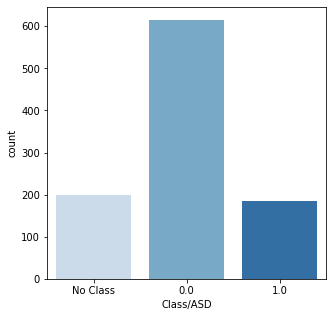

In [18]:
plt.figure( figsize=(5,5) )
sns.countplot(x=df["Class/ASD"], palette="Blues", linewidth=1 )
plt.show()

##To visualise the different ethnicities as a pie chart 
#### Unknown is where the ethnicity wasn't specified 

In [19]:
sns.set( rc = {'figure.figsize':(5,5)} )

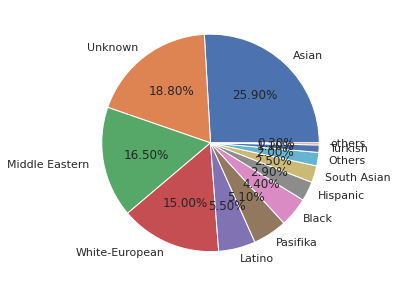

In [20]:
plt.pie( df["ethnicity"].value_counts(), labels= df["ethnicity"].unique(), autopct= "%1.2f%%")
plt.show()

In [21]:
df1=df["ethnicity"]

In [22]:
df1.unique()

array(['Asian', 'Unknown', 'Middle Eastern ', 'White-European', 'Latino',
       'Pasifika', 'Black', 'Hispanic', 'South Asian', 'Others',
       'Turkish', 'others'], dtype=object)

In [23]:
#one hot encoding - classes of ethnicity as Asian, Middle Eastern, White-european and Other (4)
def ethnicity_cleaner(x):
  if x not in ["Asian","Middle Eastern ","White-European"]:
    return "Others"
  else:
    return x

In [24]:
df["ethnicity"]=df["ethnicity"].apply(ethnicity_cleaner)
#df1=df1.apply(ethnicity_cleaner)

In [25]:
df["ethnicity"].unique()

array(['Asian', 'Others', 'Middle Eastern ', 'White-European'],
      dtype=object)

##To visualise the different Countries of Residence 
#### Unknown is that which is not specificed 

###Result : There are 8 classes of significance here which is very high 

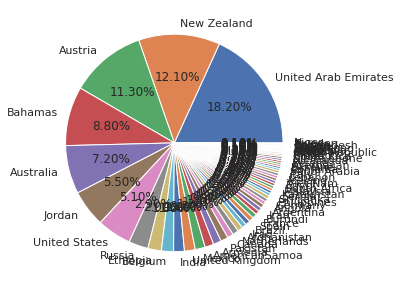

In [26]:
plt.pie( df["contry_of_res"].value_counts(), labels= df["contry_of_res"].unique(), autopct= "%1.2f%%")
plt.show()

In [27]:
df1=df["contry_of_res"]

In [28]:
df1.unique()

array(['United Arab Emirates', 'New Zealand', 'Austria', 'Bahamas',
       'Australia', 'Jordan', 'United States', 'Russia', 'Ethiopia',
       'Belgium', 'India', 'United Kingdom', 'Mexico', 'AmericanSamoa',
       'Armenia', 'Pakistan', 'Canada', 'Netherlands', 'Afghanistan',
       'Iraq', 'Brazil', 'Spain', 'France', 'Burundi', 'Iran',
       'Argentina', 'Angola', 'Germany', 'Philippines', 'Sri Lanka',
       'Serbia', 'Kazakhstan', 'Malaysia', 'South Africa', 'Egypt',
       'Viet Nam', 'Iceland', 'Lebanon', 'Italy', 'Saudi Arabia',
       'Romania', 'Ukraine', 'Azerbaijan', 'Ireland', 'Nicaragua',
       'Sierra Leone', 'Costa Rica', 'Finland', 'Japan', 'Czech Republic',
       'Aruba', 'Uruguay', 'Indonesia', 'China', 'Tonga', 'Hong Kong',
       'Ecuador', 'Cyprus', 'Bangladesh', 'Oman', 'Bolivia', 'Sweden',
       'Niger'], dtype=object)

In [29]:
#one hot encoding with 8 classes 
def country_cleaner(x):
  if x not in ['United Arab Emirates', 'New Zealand', 'Austria', 'Bahamas','Australia', 'Jordan', 'United States']:
    return "Others"
  else:
    return x

In [30]:
df["contry_of_res"]=df["contry_of_res"].apply(country_cleaner)

##Bar Graphs for relation between different categories 

#### Result : 
#### 1) Gender - the male and female classes are balanced
#### 2) Jaundice - the cases without jaundice are a lot higher than the cases with jaundice 
#### 3) The data of a family member having autism is also extremely skewed 

In [31]:
graph_df = df[["gender" , "jaundice", "austim", "Class/ASD"]].copy()

In [32]:
graph_df.describe()

,gender,jaundice,austim,Class/ASD
count,1000,1000,1000,1000.0
unique,2,2,2,3.0
top,f,no,no,0.0
freq,525,760,859,615.0


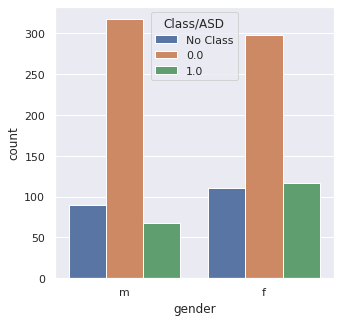

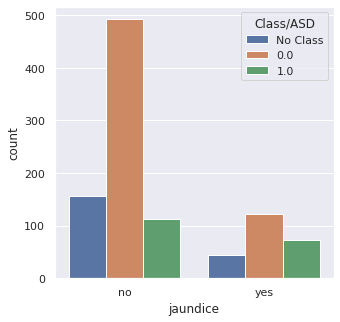

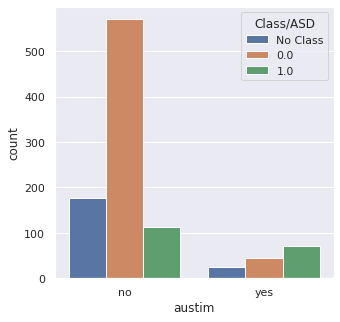

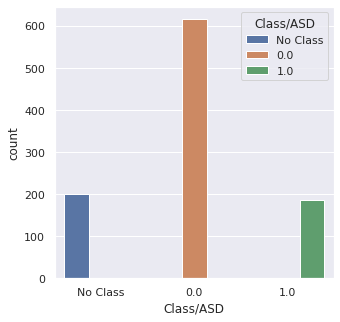

In [33]:
for i, predictor in enumerate(graph_df):
  plt.figure(i)
  sns.countplot(data=graph_df, x=predictor, hue="Class/ASD")

##Correlation of A1-A10 scores with Result in a heat map

In [34]:
# first extract only the training data as we don't want the test data to interfere 

test1, train1 = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [35]:
train1.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ind,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,White-European,no,no,United States,no,7.819715,18 and more,Self,train,0.0
1,2,0,0,0,0,0,0,0,0,0,...,Others,no,no,Australia,no,10.544296,18 and more,Unknown,train,0.0


In [36]:
train1["Class/ASD"]=train1["Class/ASD"].astype(int)
#display(train1.dtypes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


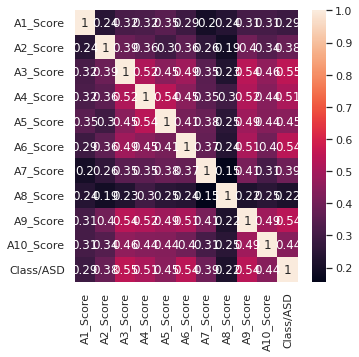

In [37]:
# displaying a heat map 
correlation= train1[ ["A1_Score", "A2_Score", "A3_Score", 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD'] ].corr()
sns.heatmap(correlation ,annot=True)

In [38]:
#The Scores with higher correlation (>0.4) are - A3, A4, A5, A6, A9, A10 
#the other columns can be removed - A1, A2, A7, A8

## Age description
##### Result- since there is only one value in the colums (18 and more) we can delete the column since it has no relvance 

In [39]:
df["age_desc"].unique()

array(['18 and more'], dtype=object)

In [40]:
df["age_desc"].nunique()

1

In [41]:
#since there is only one value in the column, we can delete this column from dataframe
df=df.drop(["age_desc"], axis=1)

In [42]:
df.head(1)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,ind,Class/ASD
0,1,0,0,0,0,0,0,0,1,0,...,m,Asian,no,no,United Arab Emirates,no,-0.914467,Unknown,test,No Class


##Scatterplot between age and Result of the AQ test
##### Result - shows that people who are taking the test (therefore the intitial signs of autism) comes between 10 and 30



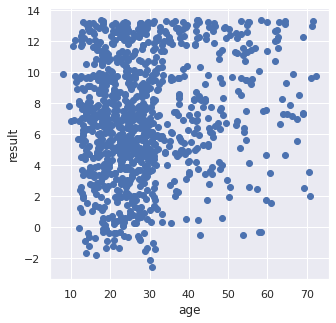

In [43]:
plt.scatter(df["age"], df["result"])
plt.xlabel("age")
plt.ylabel("result")
plt.show()

##Relation

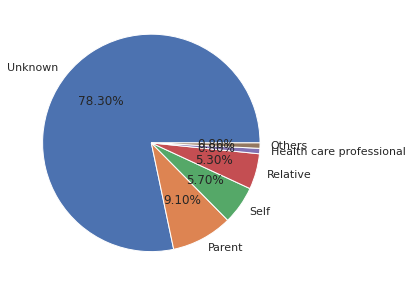

In [44]:
plt.pie( df["relation"].value_counts(), labels= df["relation"].unique(), autopct= "%1.2f%%")
plt.show()

In [45]:
df["relation"].unique()

array(['Unknown', 'Parent', 'Self', 'Relative',
       'Health care professional', 'Others'], dtype=object)

In [46]:
def relation_cleaner(x):
  if x not in ['Parent', 'Self', 'Relative', 'Health care professional']:
    return "Others"
  else:
    return x

In [47]:
df["relation"]=df["relation"].apply(relation_cleaner)

## To check the correlation of all the varibale with the Class with a heatmap

In [51]:
#one hot encoding
one_hot_df = pd.get_dummies(df, columns = [ 'gender',	'ethnicity',	'jaundice',	'austim',	'contry_of_res',	'used_app_before','relation' ])

In [57]:
one_hot_df.shape

(1000, 40)

In [58]:
df=one_hot_df


In [59]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [61]:
#convert class to a int
train["Class/ASD"]=train["Class/ASD"].astype(int)
df3=train["Class/ASD"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
train.shape

(800, 40)

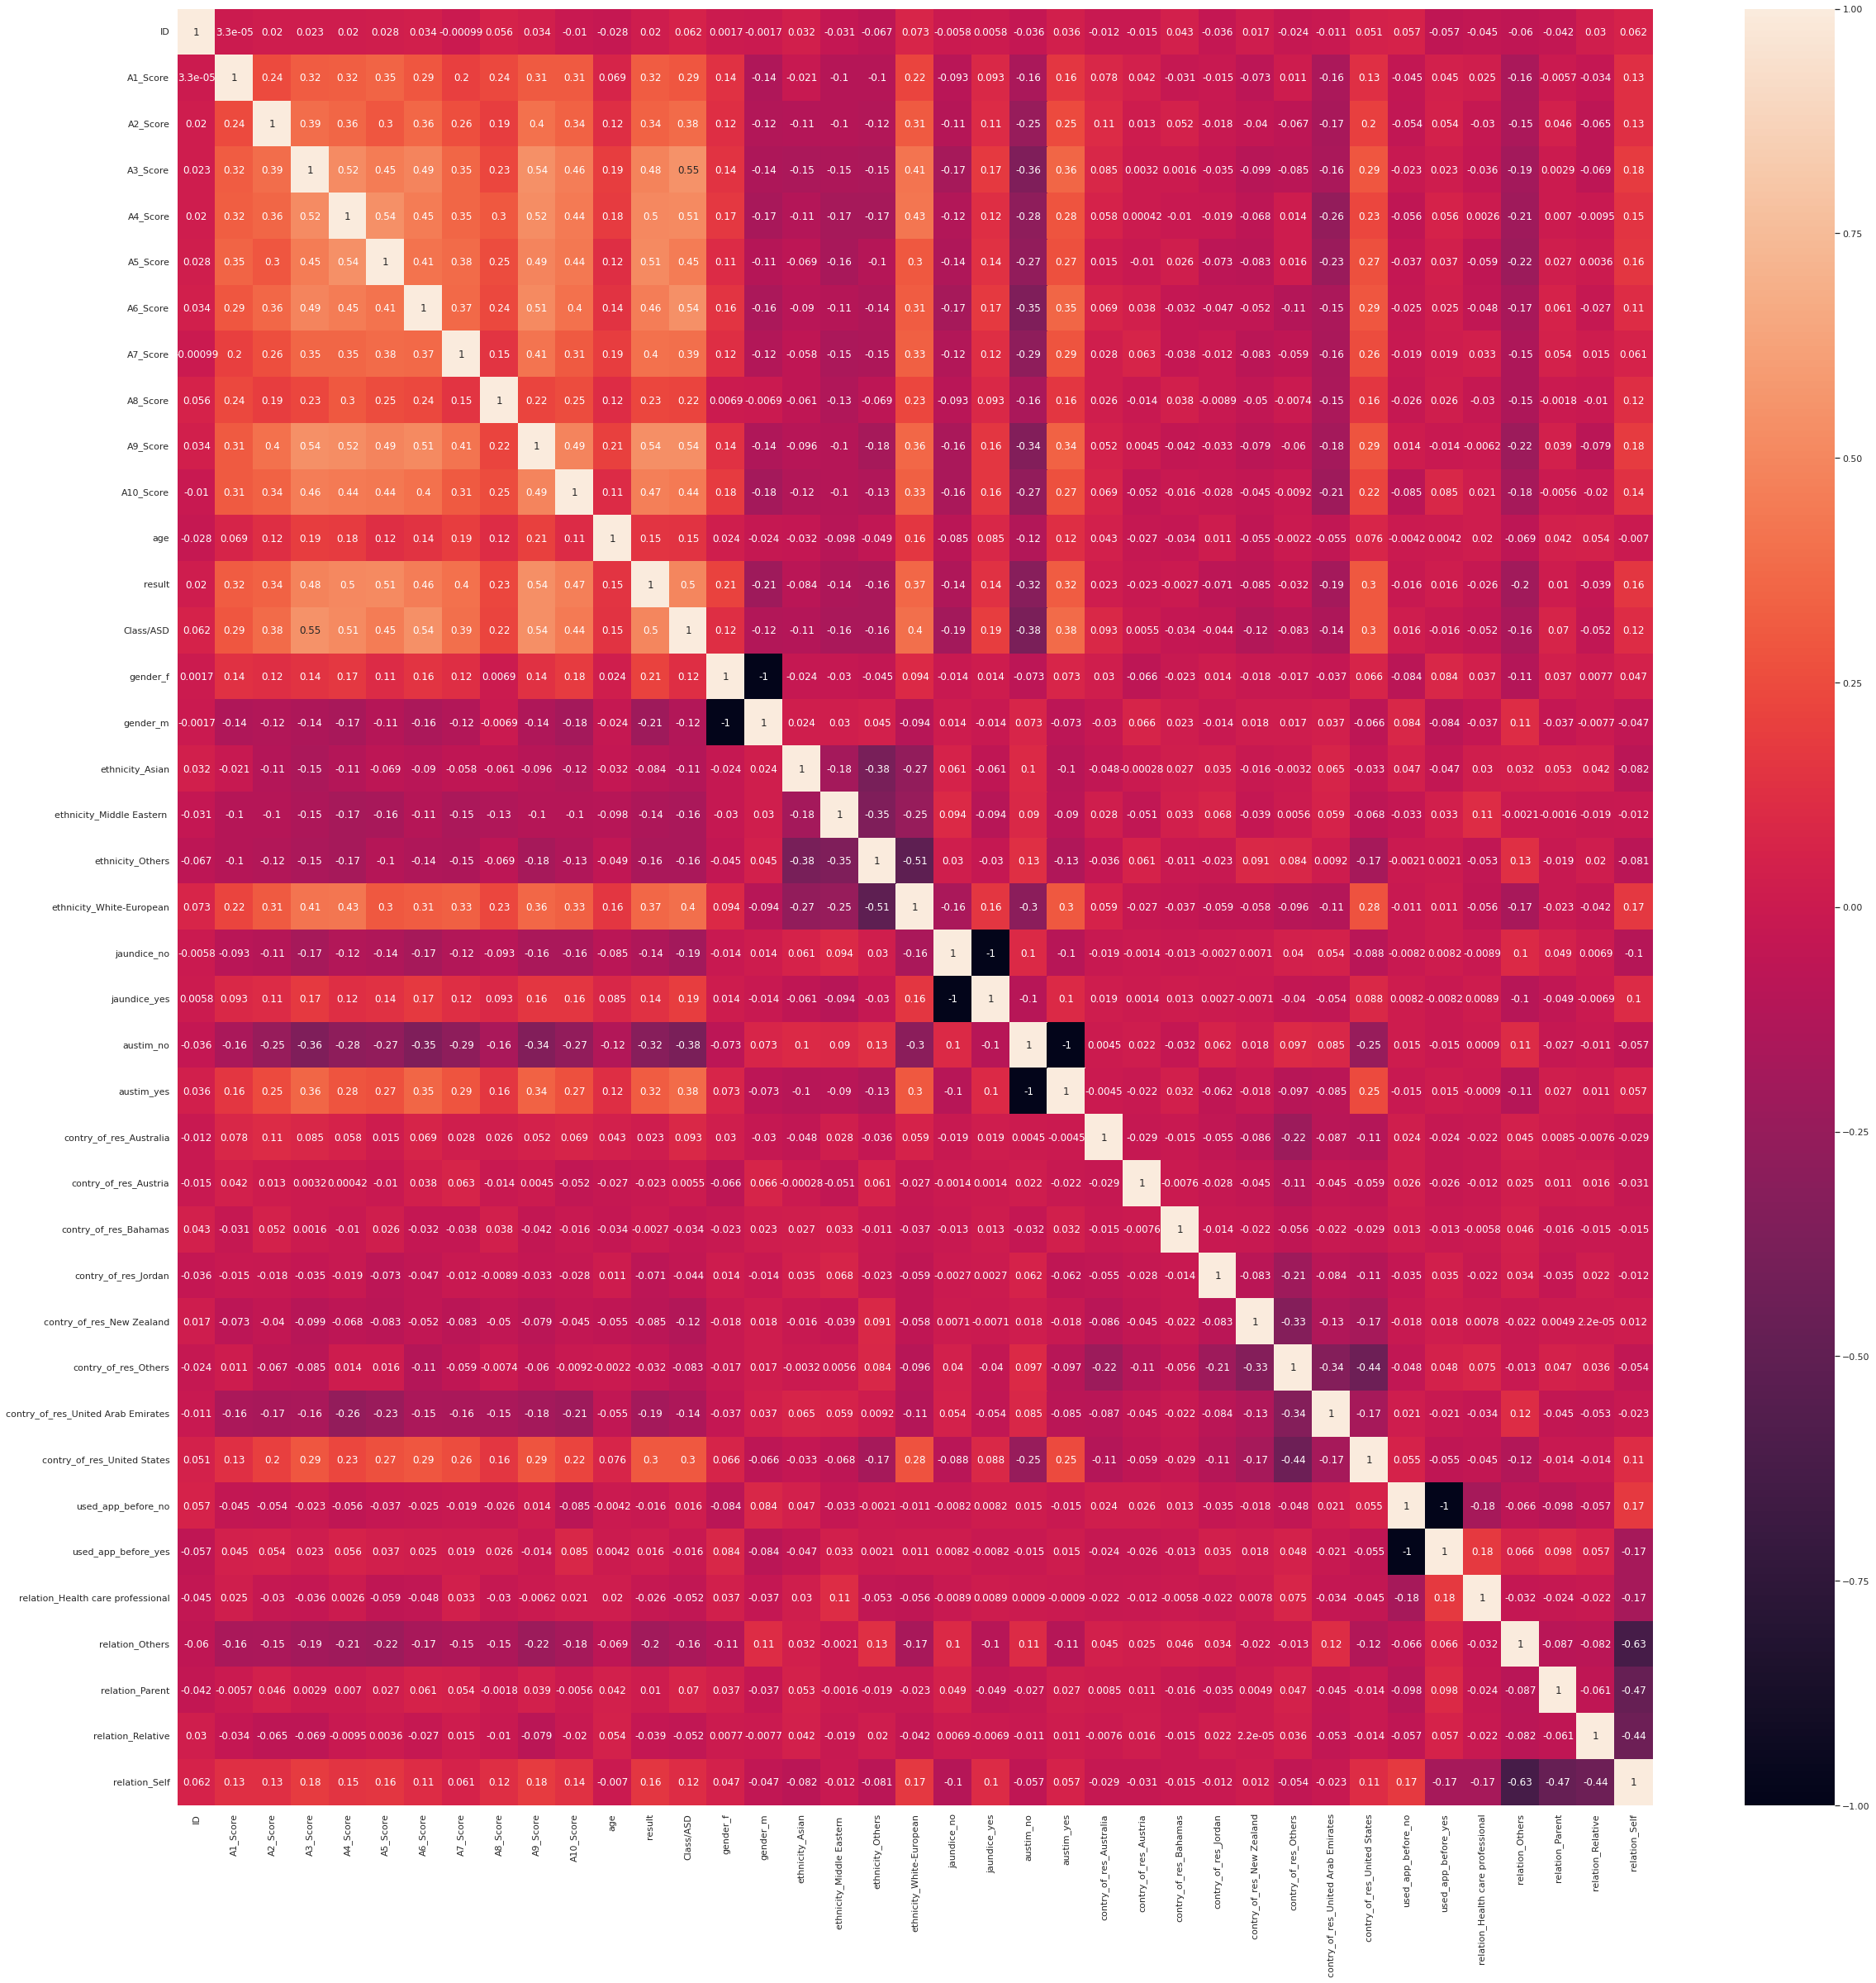

In [63]:
correlation2 = train.corr()
sns.set( rc = {'figure.figsize':(40,40)} )
sns.heatmap(correlation2, annot=True)

In [55]:
#Relevant parameters are : A1, A2, A3, A4, A5, A6, A8, A9, A10, result, ethnicity-white european, country US,autism (y/n) (15) confirmed

#dicey :  relation_others,  jaundice (y/n), age, ethnicity_Middle Eastern , ethnicity_Others,  
# country_United Arab Emirates, country_New Zealand, relation_self, gender(m/f),  ethnicity_asian (14)

#(include ethnicity remove country)


#Model to find the relevant parameters

##Training a model with 15 most important variables from heat map

In [170]:
train_1= train[ ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","result", "ethnicity_White-European", "contry_of_res_United States", 'austim_yes', 'austim_no',"Class/ASD" ] ].copy()

In [171]:
print(train_1.columns.tolist())

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'result', 'ethnicity_White-European', 'contry_of_res_United States', 'austim_yes', 'austim_no', 'Class/ASD']


In [172]:
#to build a model to train on train_1
labels = np.array(train_1['Class/ASD'])

train_1= train_1.drop('Class/ASD', axis = 1)

column_list = list(train_1.columns)

data = np.array(train_1)

In [173]:
data

array([[1., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [174]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [175]:
train_data

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [176]:
test_labels

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0])

In [84]:
#training the model 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_data, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [94]:
predictions = rf.predict(test_data)

In [103]:
print(predictions)

[0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 0]


In [102]:
predictions[predictions>=0.5]=1
predictions[predictions<0.5]= 0
predictions=predictions.astype(int)

In [104]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.81875


In [106]:
#find the IMPORTANCE of the varibales

# Get numerical feature importances
importances = list(rf.feature_importances_)


# List of tuples with variable and importance
feature_importances = [(train_data, round(importance, 2)) for train_data, importance in zip(column_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: A1_Score             Importance: 0.03
Variable: A2_Score             Importance: 0.03
Variable: A3_Score             Importance: 0.19
Variable: A4_Score             Importance: 0.06
Variable: A5_Score             Importance: 0.04
Variable: A6_Score             Importance: 0.11
Variable: A7_Score             Importance: 0.03
Variable: A8_Score             Importance: 0.01
Variable: A9_Score             Importance: 0.07
Variable: A10_Score            Importance: 0.03
Variable: result               Importance: 0.35
Variable: ethnicity_White-European Importance: 0.03
Variable: contry_of_res_United States Importance: 0.02
Variable: austim_yes           Importance: 0.01
Variable: austim_no            Importance: 0.01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

##training a model for all the variables and finding the accuracy/importance 

In [211]:
#dropping the columns with no importance 
train_model=train
train_model=train_model.drop(["ID","ind", "relation_Self", "relation_Relative", "relation_Others","relation_Health care professional" ,"used_app_before_yes","used_app_before_no","contry_of_res_United Arab Emirates" ,"contry_of_res_Austria" ,"contry_of_res_Bahamas", "austim_no","austim_yes", "ethnicity_Asian"],axis=1)
train_model.columns.tolist()

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'result',
 'Class/ASD',
 'gender_f',
 'gender_m',
 'ethnicity_Middle Eastern ',
 'ethnicity_Others',
 'ethnicity_White-European',
 'jaundice_no',
 'jaundice_yes',
 'contry_of_res_Australia',
 'contry_of_res_Jordan',
 'contry_of_res_New Zealand',
 'contry_of_res_Others',
 'contry_of_res_United States',
 'relation_Parent']

In [ ]:
train_model=train
train_model=train_model.drop(["ID","ind"],axis=1)
train_model.columns.tolist()

In [212]:
#to build a model to train on train_2

labels_model = np.array(train_model['Class/ASD'])

train_model= train_model.drop('Class/ASD', axis = 1)

columns_model = list(train_model.columns)

data_model = np.array(train_model)

In [213]:
pd.set_option('display.max_columns', None)
train_model.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_f,gender_m,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_White-European,jaundice_no,jaundice_yes,contry_of_res_Australia,contry_of_res_Jordan,contry_of_res_New Zealand,contry_of_res_Others,contry_of_res_United States,relation_Parent
0,1,0,1,1,1,1,0,1,1,1,18.605397,7.819715,1,0,0,0,1,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,10.544296,1,0,0,1,0,1,0,1,0,0,0,0,0


In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_model, labels_model, test_size = 0.2, random_state = 42)

In [203]:
X_train

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [228]:
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf2.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [229]:
predictions2 = rf2.predict(X_test)

In [230]:
predictions2[predictions2>=0.5]=1
predictions2[predictions2<0.5]= 0
predictions2=predictions2.astype(int)

In [231]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, predictions2))

Accuracy: 0.8375


In [219]:
#find the IMPORTANCE of the varibales

# Get numerical feature importances
importances2 = list(rf2.feature_importances_)


# List of tuples with variable and importance
feature_importances2 = [(X_train, round(importance2, 2)) for X_train, importance2 in zip(columns_model, importances2)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances2]

Variable: A1_Score             Importance: 0.02
Variable: A2_Score             Importance: 0.02
Variable: A3_Score             Importance: 0.19
Variable: A4_Score             Importance: 0.05
Variable: A5_Score             Importance: 0.03
Variable: A6_Score             Importance: 0.1
Variable: A7_Score             Importance: 0.02
Variable: A8_Score             Importance: 0.01
Variable: A9_Score             Importance: 0.06
Variable: A10_Score            Importance: 0.02
Variable: age                  Importance: 0.11
Variable: result               Importance: 0.24
Variable: gender_f             Importance: 0.01
Variable: gender_m             Importance: 0.01
Variable: ethnicity_Middle Eastern  Importance: 0.01
Variable: ethnicity_Others     Importance: 0.01
Variable: ethnicity_White-European Importance: 0.01
Variable: jaundice_no          Importance: 0.01
Variable: jaundice_yes         Importance: 0.01
Variable: contry_of_res_Australia Importance: 0.01
Variable: contry_of_res_Jorda

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

####The features that can be dropped are : 
relation_Self

> Indented block

1.   relation_Relative 
2. relation_Others 
3. relation_Health care professional 
4. used_app_before_yes
5. used_app_before_no
6. contry_of_res_United Arab Emirates 
7. contry_of_res_Austria
8. contry_of_res_Bahamas
9. austim_no
10. austim_yes
11. ethnicity_Asian

In [ ]:
#split train and test data after cleaning is complete 
#test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
